<a href="https://colab.research.google.com/github/nisha1365/precisionFDA/blob/main/ed_visit_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Listing all the features of "ED Visits" files.**

ED - A hospital emergency department visit is a direct personal exchange between a patient and either a physician or a health care provider working under the physician's supervision, for the purpose of seeking care and receiving personal health services.
Internalpatientid - Unique id of the patients.

Age at ed visit - Age of the patient at the ed(Emergency department) visit.

Ed visit start date - Patient visiting the Emergency department(time is recorded).

Discharge date ed - Patient getting discharged from the emergency department.(time is recorded).

Died during ed visit - Patient died during the ED visit .

First listed diagnosis icd10 subcategory - The category describes the general type of the injury or disease at first

Second listed diagnosis icd10 subcategory - The category describes the general type of the injury or disease in the second list.

State - Name of the states.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ed_visit = pd.read_csv('/content/ed_visits_train.csv')
ed_visit.head()

,Unnamed: 0,Internalpatientid,Age at ed visit,Ed visit start date,Discharge date ed,Died during ed visit,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,State
0,0,101689,64.361251,2021-08-26 00:53:30.0,2021-08-26 04:24:27.0,No,Systolic (congestive) heart failure,"Chronic kidney disease, unspecified",Virginia
1,3,107210,71.317300,2022-05-18 11:21:28.0,2022-05-18 18:30:21.0,No,"Sepsis, unspecified organism","Hypotension, unspecified",West Virginia
2,4,107866,61.164579,2017-06-26 15:41:11.0,2017-06-26 23:33:50.0,No,Other nonspecific abnormal finding of lung field,"Hypotension, unspecified",Pennsylvania
3,5,107906,66.101996,2017-02-17 06:42:34.0,2017-02-17 08:08:28.0,No,Dysuria,"Chronic kidney disease, unspecified",New York
4,6,108522,73.598130,2018-09-30 02:47:49.0,2018-09-30 04:28:57.0,No,Type 2 diabetes mellitus with circulatory comp...,Type 2 diabetes mellitus with unspecified comp...,Illinois


In [3]:
ed_visit = ed_visit.drop('Unnamed: 0', axis = 1)
ed_visit.head()

,Internalpatientid,Age at ed visit,Ed visit start date,Discharge date ed,Died during ed visit,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,State
0,101689,64.361251,2021-08-26 00:53:30.0,2021-08-26 04:24:27.0,No,Systolic (congestive) heart failure,"Chronic kidney disease, unspecified",Virginia
1,107210,71.317300,2022-05-18 11:21:28.0,2022-05-18 18:30:21.0,No,"Sepsis, unspecified organism","Hypotension, unspecified",West Virginia
2,107866,61.164579,2017-06-26 15:41:11.0,2017-06-26 23:33:50.0,No,Other nonspecific abnormal finding of lung field,"Hypotension, unspecified",Pennsylvania
3,107906,66.101996,2017-02-17 06:42:34.0,2017-02-17 08:08:28.0,No,Dysuria,"Chronic kidney disease, unspecified",New York
4,108522,73.598130,2018-09-30 02:47:49.0,2018-09-30 04:28:57.0,No,Type 2 diabetes mellitus with circulatory comp...,Type 2 diabetes mellitus with unspecified comp...,Illinois


In [4]:
ed_visit.shape

(549857, 8)

In [5]:
ed_visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549857 entries, 0 to 549856
Data columns (total 8 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Internalpatientid                          549857 non-null  int64  
 1   Age at ed visit                            549857 non-null  float64
 2   Ed visit start date                        549857 non-null  object 
 3   Discharge date ed                          549779 non-null  object 
 4   Died during ed visit                       549857 non-null  object 
 5   First listed diagnosis icd10 subcategory   549857 non-null  object 
 6   Second listed diagnosis icd10 subcategory  549857 non-null  object 
 7   State                                      549857 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.6+ MB


In [9]:
duplicate = ed_visit.duplicated('Internalpatientid')

In [10]:
if duplicate.any():
  print("Duplicates found in the 'Internalpatientid' column")
else:
  print("No Duplicates found in the 'Internalpatientid' column")

Duplicates found in the 'Internalpatientid' column


In [12]:
duplicate.sum()

491617

In [13]:

print(ed_visit['Age at ed visit'].max())
print(ed_visit['Age at ed visit'].min())
print(ed_visit['Age at ed visit'].mean())

108.576240500076
18.342004547296952
70.03421614361285


In [14]:
ed_visit['First listed diagnosis icd10 subcategory'].nunique()

3645

In [15]:
ed_visit['Second listed diagnosis icd10 subcategory'].nunique()

3060

In [16]:
ed_visit['Died during ed visit'].value_counts()

No     549746
Yes       111
Name: Died during ed visit, dtype: int64

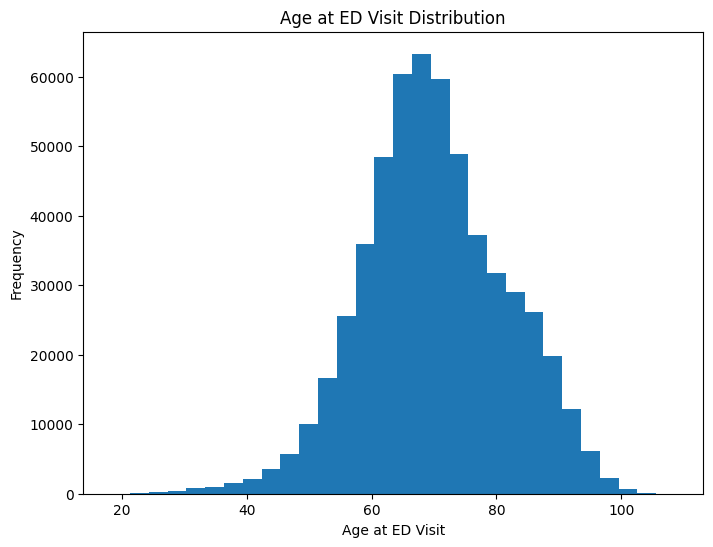

In [18]:
# Plot the distribution of age at ed visit

plt.figure(figsize=(8,6))
plt.hist(ed_visit['Age at ed visit'], bins = 30)
plt.xlabel('Age at ED Visit')
plt.ylabel('Frequency')
plt.title('Age at ED Visit Distribution')
plt.show()

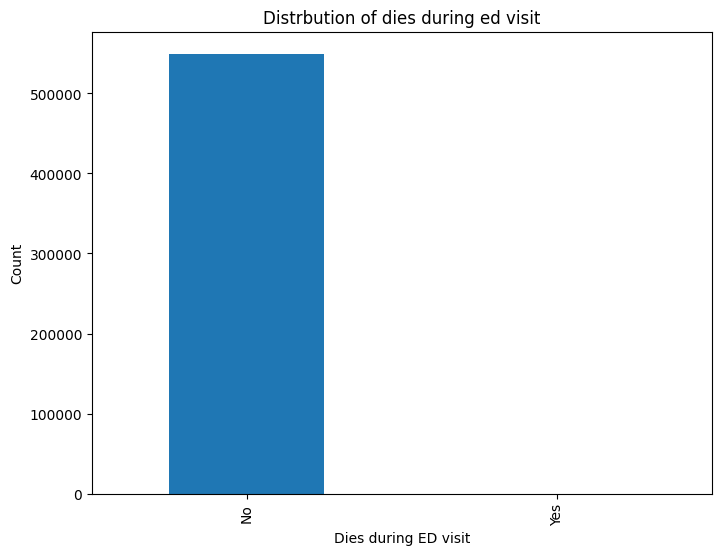

In [20]:
# Analyze the distrbution of died during ed visit

dies_during_visit_counts = ed_visit['Died during ed visit'].value_counts()

#Plot the distrbution of dies during ed visit

plt.figure(figsize=(8,6))
dies_during_visit_counts.plot(kind='bar')
plt.xlabel('Dies during ED visit')
plt.ylabel('Count')
plt.title('Distrbution of dies during ed visit')
plt.show()


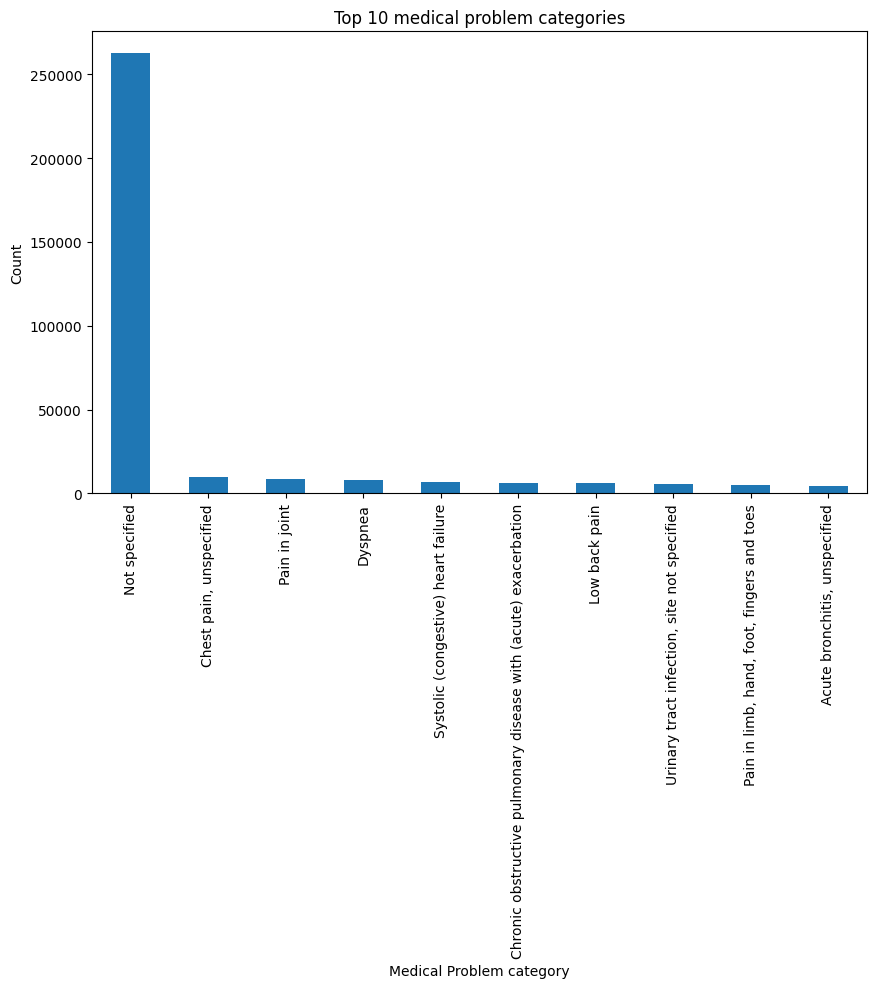

In [21]:
# get the top N most frequenct medical problem categories

top_n = 10
top_categories = ed_visit['First listed diagnosis icd10 subcategory'].value_counts().head(top_n)

#plot the top N medical problem categories

plt.figure(figsize=(10,6))
top_categories.plot(kind = 'bar')
plt.xlabel('Medical Problem category')
plt.ylabel('Count')
plt.title(f'Top {top_n} medical problem categories')
plt.show()

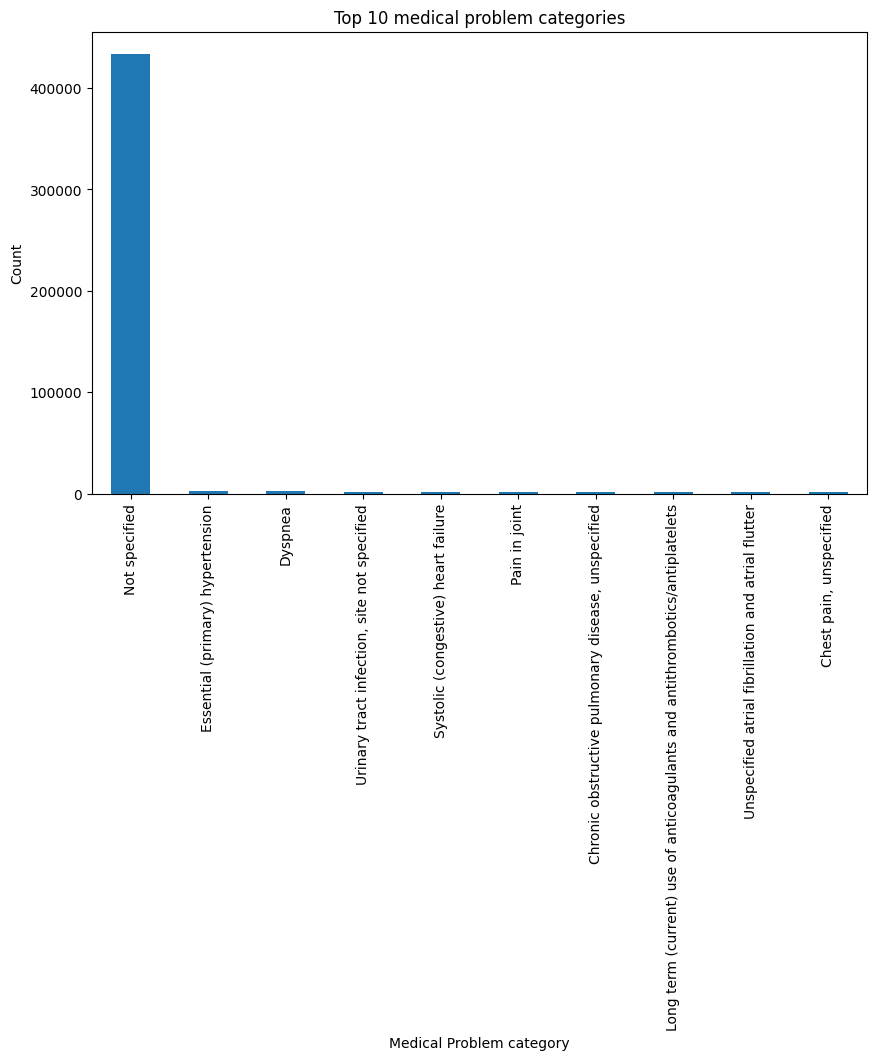

In [22]:
# get the top N most frequenct medical problem categories

top_n = 10
top_categories = ed_visit['Second listed diagnosis icd10 subcategory'].value_counts().head(top_n)

#plot the top N medical problem categories

plt.figure(figsize=(10,6))
top_categories.plot(kind = 'bar')
plt.xlabel('Medical Problem category')
plt.ylabel('Count')
plt.title(f'Top {top_n} medical problem categories')
plt.show()

In [23]:
age_ranges = [(20, 29.9),(30.0, 39.9), (40.0, 49.9), (50.0, 59.9), (60.0, 69.9),(70.0, 79.9), (80.0, 89.9), (90.0, 99.9), (100.0, 109.9)]

In [24]:
# Create the new columns based on age ranges
for range_start, range_end in age_ranges:
    range_label = f'{range_start}-{range_end}_icd10'
    second_range_label = f'{range_start}-{range_end}_second_icd10'
    ed_visit[range_label] = ed_visit.apply(
        lambda row: row['First listed diagnosis icd10 subcategory'] if range_start <= row['Age at ed visit'] <= range_end else None,
        axis=1
    )
    ed_visit[second_range_label] = ed_visit.apply(
        lambda row: row['Second listed diagnosis icd10 subcategory'] if range_start <= row['Age at ed visit'] <= range_end else None,
        axis=1
    )


In [25]:

# Group the DataFrame by 'Internalpatientid' and concatenate the icd10 values
df_grouped =ed_visit.groupby('Internalpatientid').agg(lambda x: ','.join(x.dropna()))
df_grouped

<ipython-input-25-e0edd0241d36>:2: FutureWarning: ['Age at ed visit'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_grouped =ed_visit.groupby('Internalpatientid').agg(lambda x: ','.join(x.dropna()))


,Ed visit start date,Discharge date ed,Died during ed visit,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,State,20-29.9_icd10,20-29.9_second_icd10,30.0-39.9_icd10,30.0-39.9_second_icd10,...,60.0-69.9_icd10,60.0-69.9_second_icd10,70.0-79.9_icd10,70.0-79.9_second_icd10,80.0-89.9_icd10,80.0-89.9_second_icd10,90.0-99.9_icd10,90.0-99.9_second_icd10,100.0-109.9_icd10,100.0-109.9_second_icd10
Internalpatientid,,,,,,,,,,,,,,,,,,,,,
1,"2018-12-23 09:46:17.0,2022-12-31 00:43:44.0,20...","2018-12-23 14:28:08.0,2022-12-31 06:17:15.0,20...","No,No,No,No,No,No,No","Disorders of calcium metabolism,Combined systo...","Not specified,Contusion of hip,Not specified,N...","Indiana,Indiana,Indiana,Indiana,Indiana,Indian...",,,,,...,"Not specified,Not specified","Not specified,Not specified","Disorders of calcium metabolism,Combined systo...","Not specified,Contusion of hip,Not specified,N...",,,,,,
2,"2019-03-19 09:23:07.0,2019-08-05 04:46:32.0,20...","2019-03-19 15:58:26.0,2019-08-05 11:09:40.0,20...","No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,N...","Chest pain, unspecified,Other symptoms and sig...","Not specified,Cannabinosis,Not specified,Not s...","Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texa...",,,,,...,"Chest pain, unspecified,Other symptoms and sig...","Not specified,Cannabinosis,Not specified,Not s...",,,,,,,,
4,"2014-12-10 04:47:07.0,2015-02-15 23:11:39.0,20...","2014-12-10 11:07:07.0,2015-02-16 09:33:38.0,20...","No,No,No,No,No","Epidemic vertigo,Gastrointestinal hemorrhage, ...","Other abdominal pain,Not specified,Not specifi...","Puerto Rico,Puerto Rico,Puerto Rico,Puerto Ric...",,,,,...,,,,,"Epidemic vertigo,Gastrointestinal hemorrhage, ...","Other abdominal pain,Not specified,Not specifi...",,,,
8,"2022-08-03 12:37:23.0,2012-03-26 03:38:56.0,20...","2022-08-04 01:19:27.0,2012-03-26 04:38:36.0,20...","No,No,No",Other symptoms and signs involving cognitive f...,"Not specified,Not specified,Not specified","California,Arkansas,California",,,,,...,Other symptoms and signs involving cognitive f...,"Not specified,Not specified",,,,,,,,
10,"2015-11-28 12:26:00.0,2017-05-23 00:18:50.0","2015-11-28 18:10:13.0,2017-05-23 00:58:47.0","No,No","Not specified,Not specified","Not specified,Not specified","Utah,Utah",,,,,...,"Not specified,Not specified","Not specified,Not specified",,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169050,"2013-06-07 20:39:49.0,2009-04-11 10:42:14.0","2013-06-08 04:06:17.0,2009-04-11 13:39:28.0","No,No","Not specified,Not specified","Not specified,Not specified","Florida,Florida",,,,,...,Not specified,Not specified,,,,,,,,
169053,"2013-08-07 00:11:52.0,2010-02-05 18:08:38.0,20...","2013-08-07 08:28:53.0,2010-02-05 20:46:34.0,20...","No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,N...","Dyspnea,Not specified,Other symptoms and signs...","Not specified,Not specified,Not specified,Adul...","California,California,California,California,Ca...",,,,,...,,,"Not specified,Cellulitis and acute lymphangiti...","Not specified,Not specified,Not specified,Not ...","Dyspnea,Other symptoms and signs involving cog...","Not specified,Not specified,Adult failure to t...",,,,
169057,"2024-06-07 17:43:54.0,2022-04-09 02:25:03.0,20...","2024-06-07 21:45:04.0,2022-04-09 03:09:35.0,20...","No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,N...","Syncope and collapse,Acute bronchitis due to M...","Not specified,Not specified,Other and unspecif...","California,California,California,California,Ca...",,,,,...,,,"Not specified,Not specified,Not specified,Not ...","Not specified,Not specified,Not specified,Not ...","Syncope and collapse,Acute bronchitis due to M...","Not specified,Not specified,Other and unspecif...",,,,


In [26]:
# Reset the index of the grouped DataFrame
df_grouped = df_grouped.reset_index()
df_grouped

,Internalpatientid,Ed visit start date,Discharge date ed,Died during ed visit,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,State,20-29.9_icd10,20-29.9_second_icd10,30.0-39.9_icd10,...,60.0-69.9_icd10,60.0-69.9_second_icd10,70.0-79.9_icd10,70.0-79.9_second_icd10,80.0-89.9_icd10,80.0-89.9_second_icd10,90.0-99.9_icd10,90.0-99.9_second_icd10,100.0-109.9_icd10,100.0-109.9_second_icd10
0,1,"2018-12-23 09:46:17.0,2022-12-31 00:43:44.0,20...","2018-12-23 14:28:08.0,2022-12-31 06:17:15.0,20...","No,No,No,No,No,No,No","Disorders of calcium metabolism,Combined systo...","Not specified,Contusion of hip,Not specified,N...","Indiana,Indiana,Indiana,Indiana,Indiana,Indian...",,,,...,"Not specified,Not specified","Not specified,Not specified","Disorders of calcium metabolism,Combined systo...","Not specified,Contusion of hip,Not specified,N...",,,,,,
1,2,"2019-03-19 09:23:07.0,2019-08-05 04:46:32.0,20...","2019-03-19 15:58:26.0,2019-08-05 11:09:40.0,20...","No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,N...","Chest pain, unspecified,Other symptoms and sig...","Not specified,Cannabinosis,Not specified,Not s...","Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texa...",,,,...,"Chest pain, unspecified,Other symptoms and sig...","Not specified,Cannabinosis,Not specified,Not s...",,,,,,,,
2,4,"2014-12-10 04:47:07.0,2015-02-15 23:11:39.0,20...","2014-12-10 11:07:07.0,2015-02-16 09:33:38.0,20...","No,No,No,No,No","Epidemic vertigo,Gastrointestinal hemorrhage, ...","Other abdominal pain,Not specified,Not specifi...","Puerto Rico,Puerto Rico,Puerto Rico,Puerto Ric...",,,,...,,,,,"Epidemic vertigo,Gastrointestinal hemorrhage, ...","Other abdominal pain,Not specified,Not specifi...",,,,
3,8,"2022-08-03 12:37:23.0,2012-03-26 03:38:56.0,20...","2022-08-04 01:19:27.0,2012-03-26 04:38:36.0,20...","No,No,No",Other symptoms and signs involving cognitive f...,"Not specified,Not specified,Not specified","California,Arkansas,California",,,,...,Other symptoms and signs involving cognitive f...,"Not specified,Not specified",,,,,,,,
4,10,"2015-11-28 12:26:00.0,2017-05-23 00:18:50.0","2015-11-28 18:10:13.0,2017-05-23 00:58:47.0","No,No","Not specified,Not specified","Not specified,Not specified","Utah,Utah",,,,...,"Not specified,Not specified","Not specified,Not specified",,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58235,169050,"2013-06-07 20:39:49.0,2009-04-11 10:42:14.0","2013-06-08 04:06:17.0,2009-04-11 13:39:28.0","No,No","Not specified,Not specified","Not specified,Not specified","Florida,Florida",,,,...,Not specified,Not specified,,,,,,,,
58236,169053,"2013-08-07 00:11:52.0,2010-02-05 18:08:38.0,20...","2013-08-07 08:28:53.0,2010-02-05 20:46:34.0,20...","No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,N...","Dyspnea,Not specified,Other symptoms and signs...","Not specified,Not specified,Not specified,Adul...","California,California,California,California,Ca...",,,,...,,,"Not specified,Cellulitis and acute lymphangiti...","Not specified,Not specified,Not specified,Not ...","Dyspnea,Other symptoms and signs involving cog...","Not specified,Not specified,Adult failure to t...",,,,
58237,169057,"2024-06-07 17:43:54.0,2022-04-09 02:25:03.0,20...","2024-06-07 21:45:04.0,2022-04-09 03:09:35.0,20...","No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,N...","Syncope and collapse,Acute bronchitis due to M...","Not specified,Not specified,Other and unspecif...","California,California,California,California,Ca...",,,,...,,,"Not specified,Not specified,Not specified,Not ...","Not specified,Not specified,Not specified,Not ...","Syncope and collapse,Acute bronchitis due to M...","Not specified,Not specified,Other and unspecif...",,,,
58238,169060,"2017-04-01 01:49:03.0,2015-06-16 11:51:20.0,20...","2017-04-01 22:31:44.0,2015-06-16 19:02:16.0,20...","No,No,No,No,No",Combined systolic (congestive) and diastolic (...,"Not specified,Not specified,Encounter for othe...","California,California,California,Cal

In [28]:
# Replace blank values with NaN
df_grouped.replace('', np.nan, inplace=True)
df_grouped.head()

,Internalpatientid,Ed visit start date,Discharge date ed,Died during ed visit,First listed diagnosis icd10 subcategory,Second listed diagnosis icd10 subcategory,State,20-29.9_icd10,20-29.9_second_icd10,30.0-39.9_icd10,...,60.0-69.9_icd10,60.0-69.9_second_icd10,70.0-79.9_icd10,70.0-79.9_second_icd10,80.0-89.9_icd10,80.0-89.9_second_icd10,90.0-99.9_icd10,90.0-99.9_second_icd10,100.0-109.9_icd10,100.0-109.9_second_icd10
0,1,"2018-12-23 09:46:17.0,2022-12-31 00:43:44.0,20...","2018-12-23 14:28:08.0,2022-12-31 06:17:15.0,20...","No,No,No,No,No,No,No","Disorders of calcium metabolism,Combined systo...","Not specified,Contusion of hip,Not specified,N...","Indiana,Indiana,Indiana,Indiana,Indiana,Indian...",NaN,NaN,NaN,...,"Not specified,Not specified","Not specified,Not specified","Disorders of calcium metabolism,Combined systo...","Not specified,Contusion of hip,Not specified,N...",NaN,NaN,NaN,NaN,NaN,NaN
1,2,"2019-03-19 09:23:07.0,2019-08-05 04:46:32.0,20...","2019-03-19 15:58:26.0,2019-08-05 11:09:40.0,20...","No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,N...","Chest pain, unspecified,Other symptoms and sig...","Not specified,Cannabinosis,Not specified,Not s...","Texas,Texas,Texas,Texas,Texas,Texas,Texas,Texa...",NaN,NaN,NaN,...,"Chest pain, unspecified,Other symptoms and sig...","Not specified,Cannabinosis,Not specified,Not s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,"2014-12-10 04:47:07.0,2015-02-15 23:11:39.0,20...","2014-12-10 11:07:07.0,2015-02-16 09:33:38.0,20...","No,No,No,No,No","Epidemic vertigo,Gastrointestinal hemorrhage, ...","Other abdominal pain,Not specified,Not specifi...","Puerto Rico,Puerto Rico,Puerto Rico,Puerto Ric...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"Epidemic vertigo,Gastrointestinal hemorrhage, ...","Other abdominal pain,Not specified,Not specifi...",NaN,NaN,NaN,NaN
3,8,"2022-08-03 12:37:23.0,2012-03-26 03:38:56.0,20...","2022-08-04 01:19:27.0,2012-03-26 04:38:36.0,20...","No,No,No",Other symptoms and signs involving cognitive f...,"Not specified,Not specified,Not specified","California,Arkansas,California",NaN,NaN,NaN,...,Other symptoms and signs involving cognitive f...,"Not specified,Not specified",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,"2015-11-28 12:26:00.0,2017-05-23 00:18:50.0","2015-11-28 18:10:13.0,2017-05-23 00:58:47.0","No,No","Not specified,Not specified","Not specified,Not specified","Utah,Utah",NaN,NaN,NaN,...,"Not specified,Not specified","Not specified,Not specified",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df_grouped.shape

(58240, 25)

In [31]:
duplicate1 = df_grouped.duplicated('Internalpatientid')
duplicate1.sum()

0

In [33]:
if duplicate1.any():
  print("Duplicates found in the 'Internalpatientid' column")
else:
  print("No Duplicates found in the 'Internalpatientid' column")

No Duplicates found in the 'Internalpatientid' column
